Clauder Noronha
16/11/2020

# Classificação e exploração de textos financeiros

- Base de dados: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
- Equbot: https://equbot.com/

## Importação das bibliotecas

In [1]:
import spacy
spacy.__version__

'2.2.4'

In [2]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

## Carregamento da base de dados

In [5]:
base = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/EI.EXPERT/Python paraFinanças:AnálisedeDadoseMachineLearning/Bases de Dados/stock_data.csv')

In [15]:
base.shape

(5791, 2)

Mounted at /content/drive


In [6]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [7]:
base.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [8]:
np.unique(base['Sentiment'], return_counts=True)

(array([-1,  1]), array([2106, 3685]))

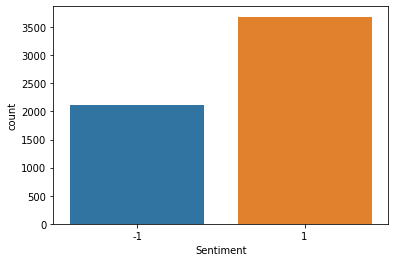

In [9]:
sns.countplot(x = base['Sentiment']);

In [10]:
base.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## Função para pré-processamento dos textos

In [11]:
!python -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.3 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=d6ee22b6824be84ac2cd6bd07ed19d64bd670187728338becaf47c91dc94adab
  Stored in directory: /tmp/pip-ephem-wheel-cache-rnnqjd7w/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [12]:
spacy.load('pt')

In [13]:
print(spacy.lang.pt.stop_words.STOP_WORDS)

{'conhecida', 'numa', 'povo', 'certamente', 'após', 'estivestes', 'onze', 'ser', 'você', 'toda', 'posso', 'tendes', 'já', 'ela', 'mesmo', 'onde', 'das', 'faço', 'então', 'vindo', 'quarto', 'de', 'direita', 'novas', 'no', 'poderá', 'além', 'nessa', 'as', 'sabe', 'seu', 'minha', 'não', 'vinda', 'vão', 'lugar', 'área', 'nos', 'partir', 'forma', 'sim', 'tens', 'estas', 'essas', 'pôde', 'me', 'seus', 'favor', 'fazeis', 'suas', 'usa', 'custa', 'quieta', 'ao', 'somos', 'menor', 'aquilo', 'ligado', 'aqui', 'dezasseis', 'longe', 'debaixo', 'que', 'diante', 'pontos', 'pois', 'só', 'querem', 'esteve', 'em', 'último', 'mês', 'demais', 'certeza', 'tenho', 'ademais', 'aqueles', 'mas', 'contudo', 'logo', 'fazemos', 'fará', 'número', 'estado', 'enquanto', 'nesse', 'oito', 'exemplo', 'obrigada', 'meses', 'bem', 'local', 'cuja', 'nossas', 'tanto', 'naquele', 'outros', 'vezes', 'sois', 'nenhuma', 'inclusive', 'vez', 'podem', 'ele', 'nós', 'porque', 'maior', 'cá', 'meus', 'quinta', 'oitavo', 'quatro', 'pa

In [14]:
pln = spacy.load('en')
pln

In [15]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{'indeed', 'twelve', "n't", 'fifty', 'could', 'whom', 'then', 'no', 'everywhere', 'as', 'made', 'without', 'this', 'him', 'using', "'d", 'side', 'have', 'hence', 'get', 'now', 'either', 'me', 'many', 'her', '’d', 'anyhow', 'hereby', 'amongst', 'unless', 'wherein', 'than', 'latterly', 'ten', 'often', 'why', 'enough', 'therefore', 'whole', 'meanwhile', 'alone', 'ever', 'both', 'moreover', 'nowhere', '‘s', 'mostly', 'front', 'rather', 'less', 'somehow', 'herself', 'show', 'n‘t', 'does', 'five', 'yourselves', 'doing', 'still', 'first', 'when', 'thereupon', 'during', 'before', 'nobody', 'two', 'cannot', 'its', 'be', 'put', 'so', 'nine', 'whither', 'beside', 'next', 'last', 'whether', 'will', 'twenty', 'however', 'nor', 'she', 'formerly', 'anything', 'around', 'keep', "'s", 'whose', 'go', 'bottom', 'regarding', 'more', 'sometimes', 'even', 'something', 'among', 'over', 'below', 'where', 'neither', 'is', 'become', 'them', 'various', 'about', 'namely', 'only', 'every', 'on', 'here', 'yours', '

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [18]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'buy apple stock care care car'

## Pré-processamento da base de dados

### Limpeza dos textos

In [19]:
base.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [20]:
base['Text'] = base['Text'].apply(preprocessamento)

In [21]:
base.head(10)

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1
5,pgnx 3.04,1
6,aap user current downtrend break short term co...,-1
7,monday relative weakness nyx win tie tap ice i...,-1
8,goog ower trend line channel test volume support,1
9,aap watch tomorrow ong entry,1


## Visualização e exploração

### Número médio de caracteres

In [22]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1,81
1,user aap movie return fea geed indicator trade...,1,59
2,user -PRON- afraid short amzn -PRON- look like...,1,89
3,mnta 12.00,1,10
4,oi 21.37,1,8


In [23]:
base['tamanho'].describe()

count    5791.000000
mean       50.535313
std        24.960696
min         0.000000
25%        31.000000
50%        50.000000
75%        69.000000
max       129.000000
Name: tamanho, dtype: float64

In [24]:
positivo = base[base['Sentiment'] == 1]

In [25]:
positivo['tamanho'].describe()

count    3685.000000
mean       49.721031
std        24.948346
min         0.000000
25%        30.000000
50%        48.000000
75%        68.000000
max       129.000000
Name: tamanho, dtype: float64

In [26]:
negativo = base[base['Sentiment'] == -1]

In [27]:
negativo['tamanho'].describe()

count    2106.000000
mean       51.960114
std        24.924272
min         2.000000
25%        32.250000
50%        51.000000
75%        71.000000
max       123.000000
Name: tamanho, dtype: float64

### Nuvem de palavras

In [28]:
textos_positivos = positivo['Text'].tolist()
len(textos_positivos)

3685

In [29]:
textos_positivos[0:10]

['kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service',
 'mnta 12.00',
 'oi 21.37',
 'pgnx 3.04',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 '-PRON- assume fcx open tomorrow 34.25 trigger buy like setup',
 '-PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm']

In [30]:
textos_positivos_string = ' '.join(textos_positivos)

In [31]:
textos_positivos_string

"kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post user aap movie return fea geed indicator trade year awesome user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service mnta 12.00 oi 21.37 pgnx 3.04 goog ower trend line channel test volume support aap watch tomorrow ong entry -PRON- assume fcx open tomorrow 34.25 trigger buy like setup -PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm aap gamco arry haverty apple extremely cheap great video user maykiljil post agree msft higher possibly north momentum come etfc break ma200 resistance solid volume friday ong set ha hit 35.65 mean resume target level .. user gameplan shoot today like trend break c+h break oc weekly trend break july fcx gapping ideal entry look pull open entry user great list particularly like fisv syk buy hold type check free list athx upper trend line ng nice pnf breakout need follow x swing swy float s

In [32]:
len(textos_positivos_string)

186906

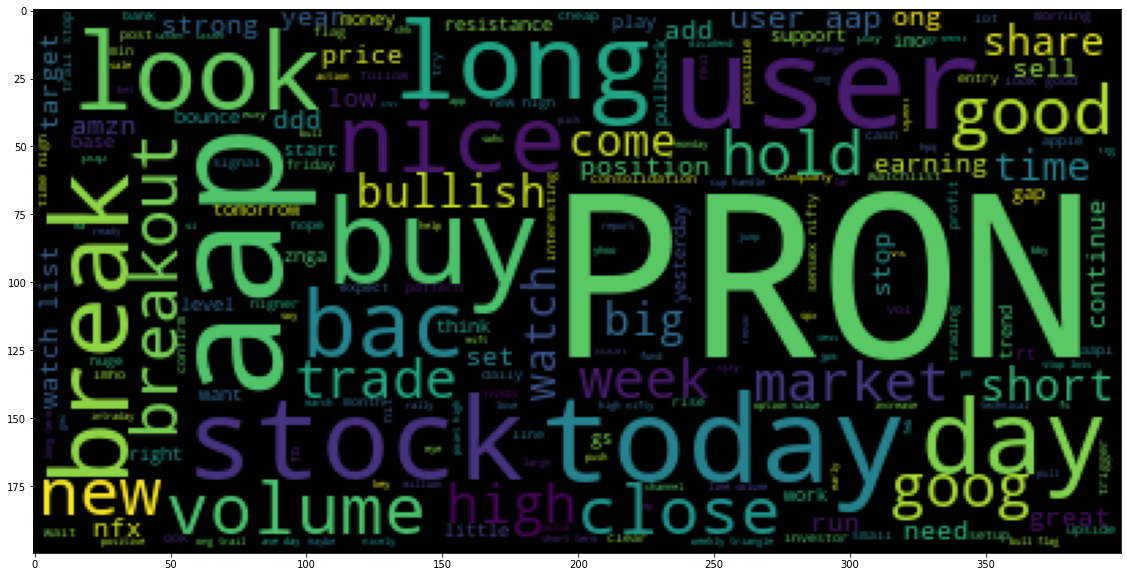

In [33]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [34]:
lista_negativo = negativo['Text'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [35]:
len(textos_negativos_string)

111533

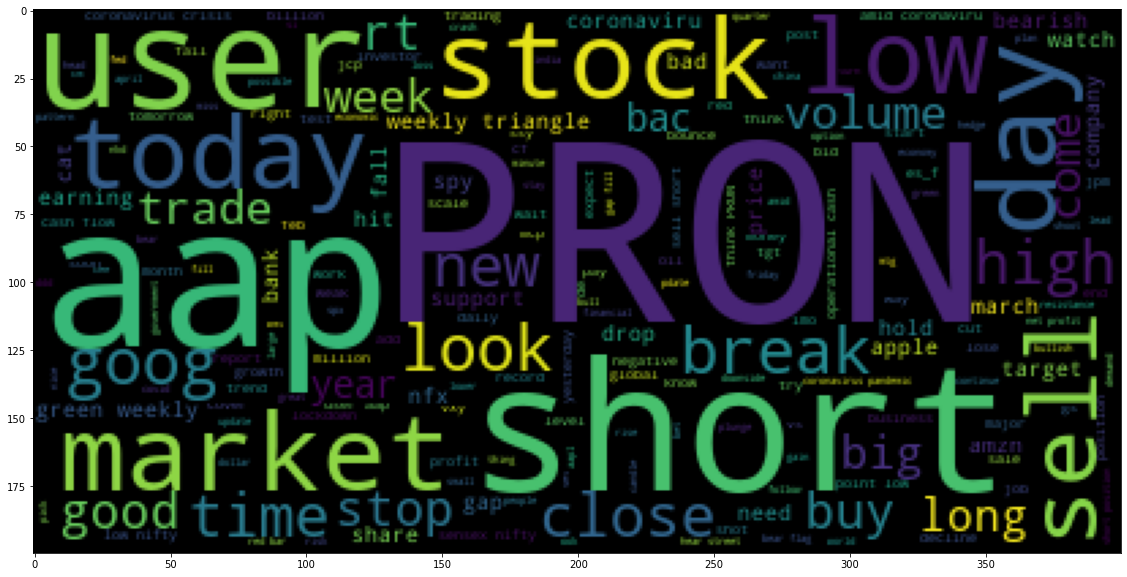

In [36]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string));

### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [37]:
documento = pln(textos_positivos_string)

In [38]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [39]:
empresas_positivas = []
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_positivas.append(entidade.text)

aap ORG
mnta ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
axa ORG
aap ORG
aap ORG
ebay ORG
aap ORG
aap ORG
msft compq new post ORG
aap ORG
ebay ORG
vbd xide ORG
isi aig nice bull ORG
pfe ORG
aap ORG
es_f ORG
spx ORG
huston -PRON- ORG
aap ORG
triangle ORG
fibs ORG
vng huge news patent ORG
vng ORG
gm ORG
vng post nice ORG
oas ORG
mca ORG
aap ORG
aap ORG
ftc ORG
vng ORG
aap ORG
aap ORG
mye ORG
aap ORG
vey ORG
fed ORG
nvda bounce continue stock ORG
rising.obv ORG
ong aapl ORG
amzn daily ORG
sma ORG
sma ORG
aap ORG
axa ORG
aap ORG
aap ORG
aap ORG
ford ORG
ford ORG
pa bank ORG
pick bac c san gs ORG
ceg ORG
aap ORG
ceg ORG
11.50 ORG
triangle ORG
ceg ORG
ceg ORG
avg ORG
aap ORG
aap ORG
obv ORG
aap ORG
avg day ORG
aap ORG
kog ORG
aap ORG
triangle acad ORG
spx +1.90 mo later -PRON- week ORG
sma ORG
voc ORG
aap ORG
aap ORG
intel guess ORG
aap ORG
aap ORG
s&p ORG
aap ORG
bullish cross ORG
obv ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
aap ORG
aap ORG
aap ORG
ssys ORG
aap ORG
aap ORG
vey green

In [40]:
len(empresas_positivas)

1050

In [41]:
empresas_positivas = set(empresas_positivas)

In [42]:
len(empresas_positivas)

364

In [43]:
print(empresas_positivas)

{'cmg time', 'cld', 'bac bank', 'cbi', 'triangle mnk', 'hhc', 'focus social network', 'vt', 'triangle gte', 'bk', '3,we', 'let?s', 'triangle essx', 'cnn', 'nkd sina', 'osv', 'michigan state niversity', 'qco', 'bac home', 'axn anik', 'delta', 'dow jones', 'turner investment calamos advisor', 'micron nvidia', 'china central bank', 'nxt', 'amazon', 'tx gd', 'etf inch', 'triangle pby', 'samsung disappoint night', 'kog', 'vey good', 'msft break solid consolidation', 'enviâ€', 'mca', 'spw', 'mark resistance', 'vix', 'guru stock sizemore', 'cof giddy lotto', 'vxx', 'sm technica', 'fio', 'nvda', 'nav', 'spx', 'wsj boeing', 'hv', 'marriott international sign partnership', 'aap cnbc', 'nvda ihs daily', 'til', 'tsn', 'aughe way', 'cvt technica', 'ng_f', 'aap rumours news idontthinkso', 'intraday support daily ike stock', 'isi aig nice bull', 'aap motley fool', 'mac', 'fio azard capital upgrade fusion', 'kkd yummy yummy', 'channel cm', 'spx compq ind', 'goo ag', 'sma pfe buffet', 'qcom', 'gd chk g

In [44]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_negativas.append(entidade.text)

aap ORG
nyx ORG
aap ORG
nkd ORG
phm ORG
coh ORG
bwd ORG
aig american international group ORG
sony ORG
wtw ORG
aap ORG
fed ORG
es_f ORG
aap ORG
aap ORG
aap ORG
obv ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
nvda enko view red dead ORG
sma ORG
aap ORG
triangle ORG
aap ORG
es_f ORG
triangle heo ORG
aap ORG
aap ORG
triangle ktos ORG
skx ORG
triangle ORG
ish jpm 1st ORG
triangle ORG
triangle ORG
triangle ORG
south yum ORG
es_f ORG
fio air ORG
aap ORG
aap ORG
17.90s ORG
ssys ORG
mkt ORG
triangle ctic ORG
clearwire corp ORG
yhoo dec bb&t cm ORG
ssys ORG
aap ORG
triangle depo ORG
triangle fnfg ORG
aap ORG
mgm ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
apple ORG
aap ORG
triangle ORG
triangle hban ORG
triangle hek ORG
spx green ORG
bell ORG
aap ORG
mgm ORG
es spx ORG
bac ORG
aap ORG
aap ORG
mkt ORG
aap ORG
triangle ktos ORG
aap ORG
triangle dn ORG
sma ORG
sma ORG
aap ORG
aap ORG
aap ORG
aap ORG
wsj party ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
a

In [45]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

226

In [46]:
print(empresas_negativas)

{'amtd -PRON- cross', 'congress', 'u.s labor force', 'coh', '17.90s', 'sna gs daily', 'dzz', 'wtw', 'si slope low macd cross', 'bac bank', 'coronavirus scare', 'mason', '.10', 'japan shinzo abe', 'phm', 'dow', 'bull', 'yr', 'sony', 'vxy fed', 'exp', 'bit.ly/xstzag zion bank', 'xom', 'ed asia watch cat flush', 'spw love bankrupt solar', 'vmw', 'ndx compq spx', 'gd', 'delta airline', 'gox gdxj imm', 'doe', 'ec', 'aig american international group', 'oyo hotels', 'adj', 'nyx', 'litre fund covid-19', 'inverse abcd imo', 'np', 'abcd', 'sna', 'ots ppl', 'axis bank icici bank', 'warner', 'apple', 'min mark post', 'apple tradingwithoutaplan yhoo', 'ssys exuberance stock', 'ecn', 'fiat', 'triangle essx', 'coronavirus pandemic', 'nvda enko view red dead', 'fundâ€', 'goldman sachs \n  ', 'treasury', 'fio air', 'british airways', 'triangle ktos', 'triangle hban', 'nfx netflix inc', 'ed daily', 'spx es nq ind air -PRON-', 'ym sca wall street retreat candle dow jones', 'axdx cmco', 'sec', 'es_f', 'cb

In [47]:
x = {"A", "B", "C"}
y = {'A', "D", "E"}
x.intersection(y)

{'A'}

In [48]:
x.difference(y), y.difference(x)

({'B', 'C'}, {'D', 'E'})

In [49]:
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [50]:
len(empresas_positivas_negativas)

62

In [51]:
print(empresas_positivas_negativas)

{'oas', 'triangle ktos', 'avg', 'coh', 'sma', 'mgm', 'ed daily', 'ibm', 'sec', 'mtg', 'qqq', 'bac bank', 'ssys', 'fed', 'es_f', 'dow', 'nav', 'triangle depo', 'spx', 'coronavirus', 'bull', 'triangle heo', 'ceg', 'opec', 'vxy', 'nxt', 'exp', 'ffiv', 'triangle sho', 'gd', 'triangle cytx', 'amazon', 'pfe', 'mkt', 'ftc', 'ebay', 'ec', 'triangle pby', 'exc', 'triangle fnfg', 'np', 'morgan stanley', 'obv', 'compq', 'apple', 'nkd', 'msft', 'aap', 'bac', 's&p', 'ge', 'goldman', 'spw', 'vix', 'triangle', 'triangle essx', 'microsoft', 'isg', 'bwd', 'goldman sachs \n  ', 'treasury', 'gm'}


In [52]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
len(empresas_somente_positivas)

302

In [53]:
print(empresas_somente_positivas)

{'nvda accumulate', 'cmg time', 'rising.obv', 'cld', 'massachusetts biotech company', 'ong aapl', 'nvda avenue', 'cst', '11.50', 'trendline support macd cross', '1.75.watch', 'bks', 'timestamp limb', 'cox crocs grow', 'hfc great group', 'cbi', 'triangle mnk', 'bullish cross', 'hee qcom', 'px', 'bollingerband break', 'cen packaging corp', 'shaâ€', 'div inc', 'california water service', 'dva nice', 'shaktikanta das bank', 'states steel corp', 'hhc', 'focus social network', 'foreign central bank', 'vt', 'microsoft ebay', 'emc exp', 'fox', 'great fed', 'triangle gte', 'infi watch', 'bk', 'ga', 'ave', 'nc corp ed weekly', 'tade watch', 'qep', 'nfx fs', 'time2research', '3,we', 'divorce qqq', 'cpb campbell', 'dark_pool', 'un', 'marijuana', 'desc', 'let?s', 'vsn', 'xco gift matter', 'axa', 'california c', 'gdx gdxj space', 'spw sunpower corporation', 'pick gentex corp', 'omex', 'cnn', 'osv', 'nkd sina', 'michigan state niversity', 'k', 'tx ec', 'qco', 'smith', 'ssys adsk', 'vng swear terrible

In [54]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
len(empresas_somente_negativas)

164

In [55]:
print(empresas_somente_negativas)

{'amtd -PRON- cross', 'congress', 'u.s labor force', '17.90s', 'sna gs daily', 'dzz', 'wtw', 'si slope low macd cross', 'coronavirus scare', 'mason', '.10', 'japan shinzo abe', 'phm', 'yr', 'sony', 'vxy fed', 'bit.ly/xstzag zion bank', 'xom', 'ed asia watch cat flush', 'spw love bankrupt solar', 'vmw', 'ndx compq spx', 'delta airline', 'gox gdxj imm', 'doe', 'oyo hotels', 'aig american international group', 'adj', 'nyx', 'litre fund covid-19', 'inverse abcd imo', 'abcd', 'sna', 'ots ppl', 'axis bank icici bank', 'warner', 'apple tradingwithoutaplan yhoo', 'min mark post', 'ecn', 'ssys exuberance stock', 'fiat', 'coronavirus pandemic', 'nvda enko view red dead', 'fundâ€', 'fio air', 'british airways', 'triangle hban', 'nfx netflix inc', 'spx es nq ind air -PRON-', 'ym sca wall street retreat candle dow jones', 'axdx cmco', 'cbs', 'iâ€', 'yahoo', 'nfx', 'bear country', 'yhoo dec bb&t cm', 'coronavirus outbreak', 'cae', 'csiq bac imho', 'triangle ctic', 'hsni miss expectation 4q2012', 'ms

## Tratamento da base de dados

In [56]:
base.drop(['tamanho'], axis = 1, inplace = True)

In [57]:
base.head()

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1


In [58]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size = 0.3)

In [59]:
base_treinamento.shape

(4053, 2)

In [60]:
base_teste.shape

(1738, 2)

In [61]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [62]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
  if sentimento == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif sentimento == -1:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  base_treinamento_final.append([texto, dic.copy()])

In [63]:
base_treinamento_final[10:15]

[["aa q4 operational cf decline m vs. q4'11 decine p spin -PRON- high q3 note q3 m q3'11",
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['new blog post momentum monday aap dip buyer miss market mojo ...',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['eqix expe fb gs hog mon pii qcom qih soda idea week favorite setup eqix',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['hek cup handle formation die pop', {'NEGATIVO': False, 'POSITIVO': True}],
 ['ovi watch list volume ave day line little',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [64]:
len(base_treinamento_final)

4053

## Criação do classificador

In [65]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [66]:
4053 / 512

7.916015625

In [67]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treinamento_final)
  erros = {}
  for batch in spacy.util.minibatch(base_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=erros)
    historico.append(erros)
  if epoca % 1 == 0:
    print(erros)

{'textcat': 1.9905227645722334e-05}
{'textcat': 1.7112554587583872e-05}
{'textcat': 1.572323424170463e-05}
{'textcat': 1.4535933132719947e-05}
{'textcat': 1.3192994856581208e-05}


In [68]:
historico_erro = []
for i in historico:
  historico_erro.append(i.get('textcat'))

In [69]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.99052276e-05, 1.99052276e-05, 1.99052276e-05, 1.99052276e-05,
       1.99052276e-05, 1.99052276e-05, 1.99052276e-05, 1.99052276e-05,
       1.71125546e-05, 1.71125546e-05, 1.71125546e-05, 1.71125546e-05,
       1.71125546e-05, 1.71125546e-05, 1.71125546e-05, 1.71125546e-05,
       1.57232342e-05, 1.57232342e-05, 1.57232342e-05, 1.57232342e-05,
       1.57232342e-05, 1.57232342e-05, 1.57232342e-05, 1.57232342e-05,
       1.45359331e-05, 1.45359331e-05, 1.45359331e-05, 1.45359331e-05,
       1.45359331e-05, 1.45359331e-05, 1.45359331e-05, 1.45359331e-05,
       1.31929949e-05, 1.31929949e-05, 1.31929949e-05, 1.31929949e-05,
       1.31929949e-05, 1.31929949e-05, 1.31929949e-05, 1.31929949e-05])

Text(0, 0.5, 'Erro')

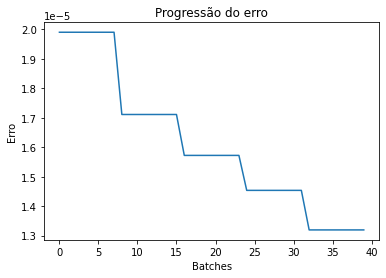

In [70]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [71]:
modelo.to_disk('modelo')

## Testes com uma frase

In [72]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [73]:
base_teste.head(10)

,Text,Sentiment
4447,goog pull light volume note weekly,1
4780,tgt search short small pos quick trade scratch...,-1
4336,aap tc hour announcement split/ div inc outshi...,1
2829,fos short -PRON- test -PRON- 50dma awesome tra...,-1
3396,follow mbi conservative fair value ... realist...,1
4462,s want break,1
3040,aap mo add -PRON- dow --- split,1
3632,isg decent vol bounce day trend hold short,-1
901,ng like -PRON- stewie mention 20ma pullbk2 b g...,1
3031,user pphm big drop,-1


### Texto positivo

In [75]:
texto_positivo = base_teste['Text'][4336]
texto_positivo

'aap tc hour announcement split/ div inc outshines samsung big day .. oh itv/ iwatch combo time machine'

In [76]:
previsao = modelo_carregado(texto_positivo)
previsao

aap tc hour announcement split/ div inc outshines samsung big day .. oh itv/ iwatch combo time machine

In [77]:
previsao.cats

{'NEGATIVO': 0.4755876958370209, 'POSITIVO': 0.6779254078865051}

In [78]:
texto_positivo = 'Apple stock is increasing and I will buy for a good price'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'apple stock increase buy good price'

In [79]:
modelo_carregado(texto_positivo).cats

{'NEGATIVO': 0.2806805372238159, 'POSITIVO': 0.6676753759384155}

### Texto negativo

In [80]:
texto_negativo = base_teste['Text'][3632]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.46293458342552185, 'POSITIVO': 0.6680561304092407}

## Avaliação do modelo

In [81]:
previsoes = []
for texto in base_teste['Text']:#percorrer todos os textos da base de dados 
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [82]:
#visulizar os primeiros registros 
previsoes[0:5]

[{'NEGATIVO': 0.18737982213497162, 'POSITIVO': 0.6862087249755859},
 {'NEGATIVO': 0.578895092010498, 'POSITIVO': 0.7130271792411804},
 {'NEGATIVO': 0.4755876958370209, 'POSITIVO': 0.6779254078865051},
 {'NEGATIVO': 0.6902647614479065, 'POSITIVO': 0.750923216342926},
 {'NEGATIVO': 0.39918622374534607, 'POSITIVO': 0.6420707702636719}]

In [83]:
len(previsoes)
#tamanho da variavel 

1738

In [86]:
previsoes_final = []
for previsao in previsoes:#Percorrer a lista 
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [87]:
previsoes_final, np.unique(previsoes_final)
#Pegar so os valores unicos 1 -1 

(array([1, 1, 1, ..., 1, 1, 1]), array([-1,  1]))

In [89]:
#criar outra variavel 
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([ 1, -1,  1, ...,  1, -1,  1])

In [90]:
#Fazer importações. 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

#TEMOS 65% da bse de dados de accuracy

0.6565017261219793

In [91]:
#mATRIZ DE CONFUSÃO 
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[  34,  588],
       [   9, 1107]])

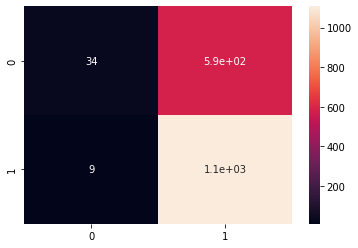

In [92]:
sns.heatmap(cm, annot=True);

In [93]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.79      0.05      0.10       622
           1       0.65      0.99      0.79      1116

    accuracy                           0.66      1738
   macro avg       0.72      0.52      0.44      1738
weighted avg       0.70      0.66      0.54      1738



Classification reporter, como a base de dados tem mais exemplos das classe 1 que é positivo temos 1116 contra 622. Precisamos fazer.


A analise F1-Score, que ela é mais util quando temos dados desbalanceados.POdemos observar que o f1-score é 0.44% ele acaba 
Diminuindo um pouco pelo fato que temos uma base de dados desbalanceada, ele tem a trendencia de acertar 1 que são textos postivos, o modelo idetifica corretamente 
Mais uma classe do que outra.


Analisando o RECALL E O PRECISION com relação a classe 1 o modelo identifica corretamente o 99% dos textos positivos. 
Quando identifica o texto positivo a precisão é de 65%.

Em outras palavras ele tem 65 % que esse exto é um texto posivo. 

Em relação a texto negativo nós temos 0.5% da base de dados. Pelo fato também que temos uma base de dados menor com palavras negativas.

Agora temos uma ferramneta para descobrir queia as empresas que as pessoas andam falando mal para que evite investir nessas empresas.


